Enter an image number to test: 25
Expected image: 25


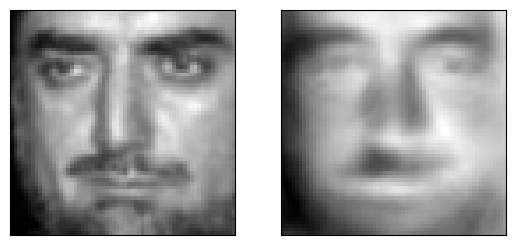

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2


os.chdir("C:\\Users\\sabba\\Documents\\lfwcrop_grey\\lfwcrop_grey\\faces")

#Place image into respective subplots
def put_image(axes, data):
    axes.set_xticks([])
    axes.set_yticks([])
    axes.xaxis.set_tick_params(labelbottom = False)
    axes.yaxis.set_tick_params(labelbottom = False)
    axes.imshow(data.reshape(64, 64), cmap = 'gray')

#Define constants    
numPhotos = 1000
rows, cols = 10, 10

#This is the number of eigenfaces used as the basis for the face space
numEigface = 25


#Retrieve the file names of all photos
nameList = os.listdir()[0: numPhotos]


#Ask the user what image number to test
testimgnum = int(input("Enter an image number to test: "))
testimg = plt.imread(nameList[testimgnum]).flatten()



#Adjust subplot settings
fig, img = plt.subplots(1, 2)
fig.subplots_adjust(hspace = 0)
photoarr = []


#Read data from each image and store them as a row vector
for image in nameList:
    data = plt.imread(image).flatten()
    photoarr.append(data)

#Find mean face
mean = np.mean(photoarr, axis = 0)

#Mean center the data
for i in range(0, numPhotos):
    photoarr[i] = photoarr[i] - mean

#Find the SVD decomposition of A
U, S, V = np.linalg.svd(np.transpose(photoarr))

#Transpose it back for easy row access
U = np.transpose(U)

#Truncate U to contain only a certain number of eigenfaces
U = U[:numEigface]


#Normalize rows of U^T (columns of U)
for index in range(0, numEigface):
    U[index] = U[index] * (1/np.linalg.norm(U[index]))


#Find weights matrix
weights = np.dot(photoarr, np.transpose(U))

#Find projections of original faces (reconstructed face)
reconstructed = np.dot(weights, U)



#Now we project the unknown image onto the face space
proj = np.dot(testimg - mean, np.transpose(U))


#Find the minimum error of the projection and record the minimum value and image number
min = np.linalg.norm(weights[0] - proj) 
finalindex = 0
for i in range(0, numPhotos):
    error = np.linalg.norm(weights[i] - proj)
    if(error < min):
        min = error 
        finalindex = i

        
#Print the image number
print("Expected image: " + str(finalindex))


#Display the original image (left) and reconstructed image (right)
put_image(img[0], testimg)
put_image(img[1], np.transpose(np.dot(weights[finalindex], U)))

